In [59]:
import pandas as pd
import numpy as np
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    # initialize the dataframe:
    poly_dataframe = pd.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature
    poly_dataframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            poly_dataframe[name] = feature.apply(lambda x: x**power)
        
    return poly_dataframe


For the remainder of the assignment we will be working with the house Sales data as in the previous notebooks. Load in the data and also sort the sales SFrame by ‘sqft_living’. When we plot the fitted values we want to join them up in a line and this works best if the variable on the X-axis (which will be ‘sqft_living’) is sorted. For houses with identical square footage, we break the tie by their prices.

In [60]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [61]:
sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)
sales = sales.sort(['sqft_living','price'])

Make a 1 degree polynomial SFrame with sales[‘sqft_living’] as the the feature. Call it ‘poly1_data’.

In [62]:
poly1_data = sales['sqft_living']

Add sales[‘price’] to poly1_data as this will be our output variable. e.g.

In [63]:
poly1_data = polynomial_dataframe(sales['sqft_living'], 1)
poly1_data['price'] = sales['price']

Use graphlab.linear_regression.create (or another linear regression library) to compute the regression weights for predicting sales[‘price’] based on the 1 degree polynomial feature ‘sqft_living’. The result should be an intercept and slope. 

In [64]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression

In [65]:
model1 = LinearRegression()
model1.fit(poly1_data['power_1'].reshape(len(poly1_data['power_1']),1), poly1_data['price'].reshape(len(poly1_data['price']),1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [66]:
print model1.intercept_, model1.coef_

[-43580.74309448] [[ 280.6235679]]


Next use the produce a scatter plot of the training data (just square feet vs price) and add the fitted model. e.g. with matplotlib and SFrames:

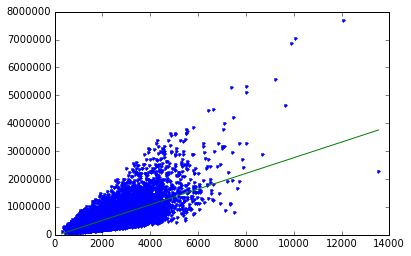

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(poly1_data['power_1'].reshape(len(poly1_data['power_1']),1),poly1_data['price'].reshape(len(poly1_data['price']),1),'.',
poly1_data['power_1'].reshape(len(poly1_data['power_1']),1), model1.predict(poly1_data['power_1'].reshape(len(poly1_data['power_1']),1)),'-')

Now that you have plotted the results using a 1st degree polynomial, try it again using a 2nd degree and 3rd degree polynomial. Look at the fitted lines, do they appear as you would expect

In [68]:
poly2_data = polynomial_dataframe(sales['sqft_living'], 2)
my_features = poly2_data.columns

In [69]:
poly2_data['price'] = sales['price']

In [70]:
model2 = LinearRegression()
model2.fit(poly2_data[my_features], poly2_data['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [71]:
print model2.intercept_, model2.coef_

199222.279305 [  6.79940947e+01   3.85812609e-02]


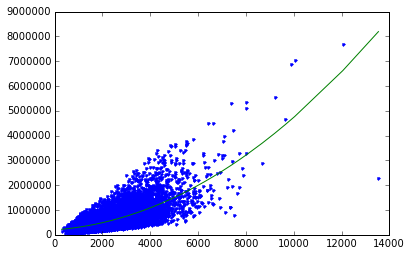

In [72]:
%matplotlib inline
plt.plot(poly2_data['power_1'].reshape(len(poly2_data['power_1']),1),poly2_data['price'].reshape(len(poly2_data['price']),1),'.',
poly2_data['power_1'].reshape(len(poly2_data['power_1']),1), model2.predict(poly2_data[my_features]),'-')

try 15th degree

In [73]:
poly15_data = polynomial_dataframe(sales['sqft_living'], 15)

In [74]:
poly15_data.head()

,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15
19452,290,84100,24389000,7072810000,2.051115e+12,5.948233e+14,1.724988e+17,5.002464e+19,1.450715e+22,4.207072e+24,1.220051e+27,3.538148e+29,1.026063e+32,2.975582e+34,8.629189e+36
15381,370,136900,50653000,18741610000,6.934396e+12,2.565726e+15,9.493188e+17,3.512479e+20,1.299617e+23,4.808584e+25,1.779176e+28,6.582952e+30,2.435692e+33,9.012061e+35,3.334463e+38
860,380,144400,54872000,20851360000,7.923517e+12,3.010936e+15,1.144156e+18,4.347792e+20,1.652161e+23,6.278212e+25,2.385721e+28,9.065738e+30,3.444980e+33,1.309093e+36,4.974552e+38
18379,384,147456,56623104,21743271936,8.349416e+12,3.206176e+15,1.231172e+18,4.727699e+20,1.815436e+23,6.971275e+25,2.676970e+28,1.027956e+31,3.947353e+33,1.515783e+36,5.820608e+38
4868,390,152100,59319000,23134410000,9.022420e+12,3.518744e+15,1.372310e+18,5.352009e+20,2.087284e+23,8.140406e+25,3.174758e+28,1.238156e+31,4.828807e+33,1.883235e+36,7.344616e+38


In [75]:
my_features = poly15_data.columns

In [76]:
poly15_data['price'] = sales['price']

In [77]:
model15 = LinearRegression()
model15.fit(poly15_data[my_features], poly15_data['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [78]:
print model15.intercept_, model15.coef_

537116.329638 [  4.56404164e-91   1.42712173e-50   7.68159926e-56   5.37872327e-60
   1.04545560e-74   2.68575522e-71   2.26147568e-67   1.85900299e-63
   1.47144116e-59   1.09771012e-55   7.43509038e-52   4.23015578e-48
   1.61618577e-44  -2.49283826e-48   9.59718336e-53]


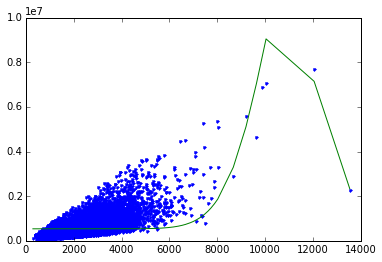

In [79]:
%matplotlib inline
plt.plot(poly15_data['power_1'].reshape(len(poly15_data['power_1']),1),poly15_data['price'].reshape(len(poly15_data['price']),1),'.',
poly15_data['power_1'].reshape(len(poly15_data['power_1']),1), model15.predict(poly15_data[my_features]),'-')

Estimate a 15th degree polynomial on all 4 sets, plot the results and view the coefficients for all four models.

In [80]:
def plot_15degree(set):
    poly15_data = polynomial_dataframe(set['sqft_living'], 15)
    my_features = poly15_data.columns
    poly15_data['price'] = set['price']
    model15 = LinearRegression()
    model15.fit(poly15_data[my_features], poly15_data['price'])
    print model15.intercept_, model15.coef_ #use print vs. return since return can only apply to function
    plt.plot(poly15_data['power_1'].reshape(len(poly15_data['power_1']),1),poly15_data['price'].reshape(len(poly15_data['price']),1),'.',
             poly15_data['power_1'].reshape(len(poly15_data['power_1']),1), model15.predict(poly15_data[my_features]),'-')

In [81]:
set1 = pd.read_csv('wk3_kc_house_set_1_data.csv')
set2 = pd.read_csv('wk3_kc_house_set_2_data.csv')
set3 = pd.read_csv('wk3_kc_house_set_3_data.csv')
set4 = pd.read_csv('wk3_kc_house_set_4_data.csv')

274654.416839 [  1.76309322e-05   4.45209565e-02   4.14184801e-06  -4.48299021e-10
  -2.26644545e-14   1.06410506e-16  -7.16384897e-16   2.94462194e-16
  -1.75455816e-16  -1.27725700e-15   1.21016490e-16   5.51015870e-16
   2.01211397e-16  -3.22147875e-16  -3.72316797e-16]


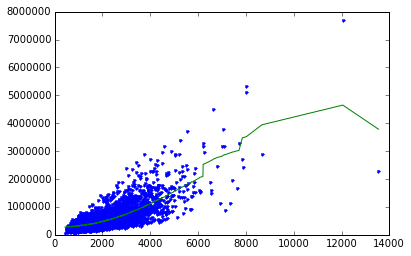

In [82]:
plot_15degree(set1)

255823.035345 [  3.00696173e-05   6.13343008e-02  -2.49646946e-06   1.10857456e-10
  -1.77208810e-14   7.97039963e-16  -3.56019685e-16  -3.01230718e-16
  -6.11363134e-16   3.64507277e-16   7.06924979e-16   7.64851144e-16
   1.03890362e-15  -4.78052606e-16   1.35362916e-15]


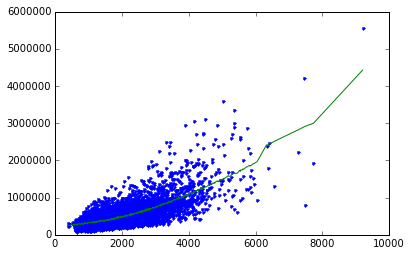

In [83]:
plot_15degree(set2)

252002.143168 [  3.05151126e-05   6.76505534e-02  -5.32626420e-06   4.60005656e-10
  -1.31782167e-14  -1.85903535e-16  -3.63807177e-16   5.76333430e-16
   4.40116376e-16   5.39425255e-16  -2.05761480e-16   1.13209891e-15
   6.20832342e-16   3.32806473e-16  -2.35244804e-16]


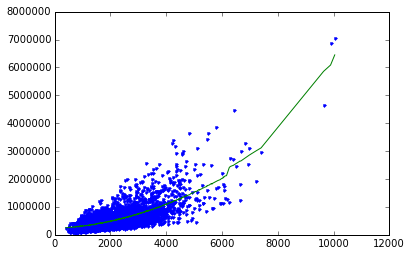

In [84]:
plot_15degree(set3)

269673.483721 [  2.93423692e-05   5.48175325e-02  -1.45794817e-06   7.57359483e-11
   3.46421763e-14  -1.23930208e-15  -3.99670478e-16   9.03673313e-16
  -4.92003619e-16  -5.42701710e-16   2.74000741e-16   3.96425353e-16
   2.99025408e-16  -1.03384865e-15  -3.33304232e-16]


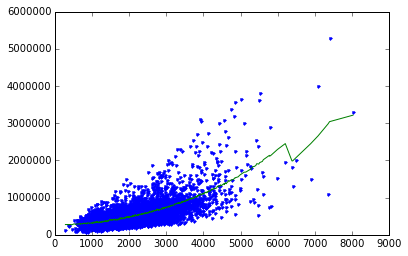

In [85]:
plot_15degree(set4)

Since the “best” polynomial degree is unknown to us we will use cross validation to select the best degree. If you’re using SFrames then create a training, validation and testing subsets as follows:

Now for each degree from 1 to 15:

Build an polynomial data set using training_data[‘sqft_living’] as the feature and the current degree
Add training_data[‘price’] as a column to your polynomial data set
Learn a model on TRAINING data to predict ‘price’ based on your polynomial data set at the current degree
Compute the RSS on VALIDATION for the current model (print or save the RSS)

In [86]:
def plot_degree(data1, data2, degree):
    poly_data = polynomial_dataframe(data1['sqft_living'], degree)
    valid_data = polynomial_dataframe(data2['sqft_living'], degree)
    my_features = poly_data.columns
    my_features_valid = valid_data.columns
    poly_data['price'] = data1['price']
    valid_data['price'] = data2['price']
    model = LinearRegression()
    model.fit(poly_data[my_features], poly_data['price'])
    return np.sum((model.predict(valid_data[my_features]) - valid_data['price'])**2) #use print vs. return since return can only apply to function

In [87]:
train_data = pd.read_csv('wk3_kc_house_train_data.csv', dtype=dtype_dict)
valid_data = pd.read_csv('wk3_kc_house_valid_data.csv', dtype=dtype_dict)
test_data = pd.read_csv('wk3_kc_house_test_data.csv', dtype=dtype_dict)

In [88]:
range_list = []
for i in range(1,16):
    range_list.append((plot_degree(train_data, valid_data, i),i))
min(range_list)


(566268584232998.6, 6)

Quiz Question: what is the RSS on TEST data for the model with the degree selected from Validation data? (Make sure you got the correct degree from the previous question)

In [89]:
plot_degree(train_data, test_data, 6)

135225109698298.17

# Ridge Regression Assignment 1

Let us revisit the 15th-order polynomial model using the 'sqft_living' input. Generate polynomial features up to degree 15 using `polynomial_sframe()` and fit a model with these features. When fitting the model, use an L2 penalty of 1.5e-5:

In [90]:
l2_small_penalty = 1.5e-5

In [91]:
poly15_data = polynomial_dataframe(sales['sqft_living'], 15) # use equivalent of `polynomial_sframe`
model = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
model.fit(poly15_data, sales['price'])

Ridge(alpha=1.5e-05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, solver='auto', tol=0.001)

In [92]:
print model.intercept_, model.coef_

220664.375053 [  1.24873306e+02  -4.77376011e-02   3.01446238e-05  -2.44419942e-09
  -1.94153675e-13   8.54085686e-18   1.51142121e-21   8.27979094e-26
   6.52603100e-31  -3.27895017e-34  -3.87962315e-38  -2.72437650e-42
  -1.07790800e-46   3.78242694e-51   1.39790296e-54]


Observe Overfitting
Recall from Module 3 (Polynomial Regression) that the polynomial fit of degree 15 changed wildly whenever the data changed. In particular, when we split the sales data into four subsets and fit the model of degree 15, the result came out to be very different for each subset. The model had a high variance. We will see in a moment that ridge regression reduces such variance. But first, we must reproduce the experiment we did in Module 3.

In [93]:
l2_s_penalty=1e-9
def plot_15degree(set):
    poly15_data = polynomial_dataframe(set['sqft_living'], 15)
    my_features = poly15_data.columns
    poly15_data['price'] = set['price']
    model15 = linear_model.Ridge(alpha=l2_s_penalty, normalize=True)
    model15.fit(poly15_data[my_features], poly15_data['price'])
    print pd.Series(model15.coef_,index=my_features) #use print vs. return since return can only apply to function
    plt.plot(poly15_data['power_1'].reshape(len(poly15_data['power_1']),1),poly15_data['price'].reshape(len(poly15_data['price']),1),'.',
             poly15_data['power_1'].reshape(len(poly15_data['power_1']),1), model15.predict(poly15_data[my_features]),'-')

In [94]:
set1 = pd.read_csv('wk3_kc_house_set_1_data.csv',dtype=dtype_dict)
set2 = pd.read_csv('wk3_kc_house_set_2_data.csv',dtype=dtype_dict)
set3 = pd.read_csv('wk3_kc_house_set_3_data.csv',dtype=dtype_dict)
set4 = pd.read_csv('wk3_kc_house_set_4_data.csv',dtype=dtype_dict)

power_1     5.446694e+02
power_2    -3.554476e-01
power_3     1.224464e-04
power_4    -1.171754e-08
power_5    -3.905120e-13
power_6    -1.390764e-17
power_7     1.478603e-20
power_8     6.874916e-25
power_9    -7.572038e-29
power_10   -1.040973e-32
power_11   -3.718444e-37
power_12    3.399894e-41
power_13    5.565920e-45
power_14    2.537614e-49
power_15   -3.351529e-53
dtype: float64


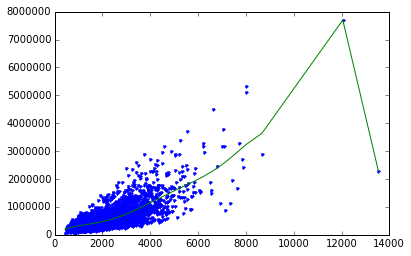

In [95]:
plot_15degree(set1)

power_1     8.593627e+02
power_2    -8.181183e-01
power_3     4.288800e-04
power_4    -9.127707e-08
power_5    -2.696046e-12
power_6     3.739804e-15
power_7    -1.427119e-19
power_8    -6.307948e-23
power_9    -1.445594e-27
power_10    7.443211e-31
power_11    9.258660e-35
power_12    3.280179e-41
power_13   -1.295435e-42
power_14   -1.387812e-46
power_15    1.665464e-50
dtype: float64


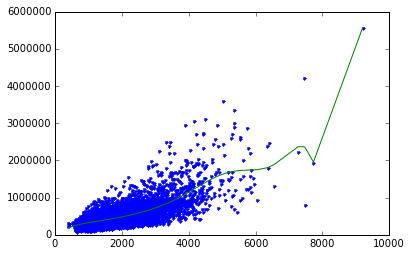

In [96]:
plot_15degree(set2)

power_1    -7.553959e+02
power_2     9.755795e-01
power_3    -4.589460e-04
power_4     7.779580e-08
power_5     7.150135e-12
power_6    -2.886020e-15
power_7    -2.136779e-20
power_8     3.380852e-23
power_9     2.191782e-27
power_10   -1.970679e-31
power_11   -4.159930e-35
power_12   -1.801963e-39
power_13    3.190712e-43
power_14    5.084569e-47
power_15   -3.933043e-51
dtype: float64


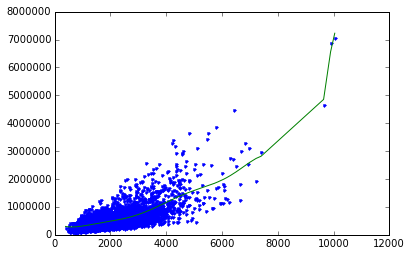

In [97]:
plot_15degree(set3)

power_1     1.119446e+03
power_2    -9.837600e-01
power_3     3.387708e-04
power_4     3.603778e-08
power_5    -4.378141e-11
power_6     5.771918e-15
power_7     7.667951e-19
power_8    -9.492976e-23
power_9    -1.960308e-26
power_10   -2.108853e-32
power_11    3.310050e-34
power_12    3.477340e-38
power_13   -2.430393e-42
power_14   -8.795535e-46
power_15    6.445698e-50
dtype: float64


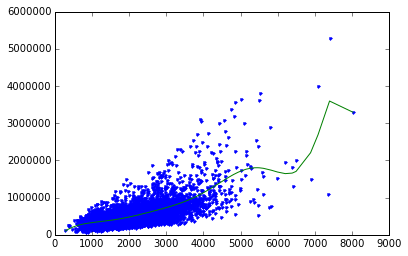

In [98]:
plot_15degree(set4)

Ridge regression comes to rescue
Generally, whenever we see weights change so much in response to change in data, we believe the variance of our estimate to be large. Ridge regression aims to address this issue by penalizing "large" weights. (The weights looked quite small, but they are not that small because 'sqft_living' input is in the order of thousands.)

Fit a 15th-order polynomial model on set_1, set_2, set_3, and set_4, this time with a large L2 penalty. Make sure to add "alpha=l2_large_penalty" and "normalize=True" to the parameter list, where the value of l2_large_penalty is given by

In [99]:
l2_large_penalty=1.23e2

In [100]:
def plot_15degree(set):
    poly15_data = polynomial_dataframe(set['sqft_living'], 15)
    my_features = poly15_data.columns
    poly15_data['price'] = set['price']
    model15 = linear_model.Ridge(alpha=l2_large_penalty, normalize=True)
    model15.fit(poly15_data[my_features], poly15_data['price'])
    print model15.intercept_, model15.coef_ #use print vs. return since return can only apply to function
    plt.plot(poly15_data['power_1'].reshape(len(poly15_data['power_1']),1),poly15_data['price'].reshape(len(poly15_data['price']),1),'.',
             poly15_data['power_1'].reshape(len(poly15_data['power_1']),1), model15.predict(poly15_data[my_features]),'-')

539103.031058 [  2.32806803e+00   3.53621608e-04   3.31969692e-08   2.00082477e-12
   1.11492559e-16   6.57786122e-21   4.12939525e-25   2.70393755e-29
   1.81614763e-33   1.23824277e-37   8.51872481e-42   5.89455598e-46
   4.09542560e-50   2.85464889e-54   1.99547476e-58]


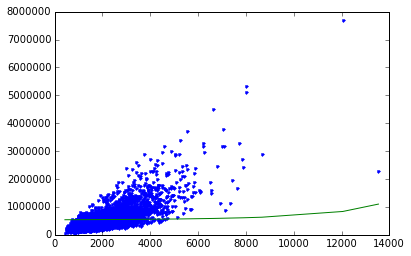

In [101]:
plot_15degree(set1)

529853.025358 [  2.09756903e+00   3.90817483e-04   6.67189944e-08   8.90002997e-12
   9.72639877e-16   9.69733682e-20   9.50564475e-24   9.44491031e-28
   9.57191338e-32   9.86945155e-36   1.03101115e-39   1.08729784e-43
   1.15453748e-47   1.23211305e-51   1.31986696e-55]


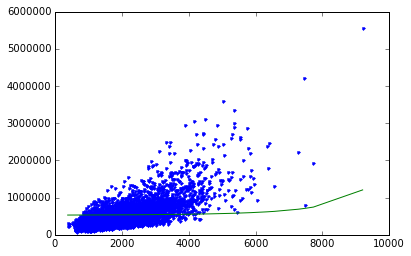

In [102]:
plot_15degree(set2)

533640.114097 [  2.28906258e+00   4.12472190e-04   6.08835345e-08   6.58572163e-12
   6.15278155e-16   5.64446634e-20   5.28834396e-24   5.07091402e-28
   4.94657273e-32   4.88043809e-36   4.85009106e-40   4.84161534e-44
   4.84635021e-48   4.85883628e-52   4.87558469e-56]


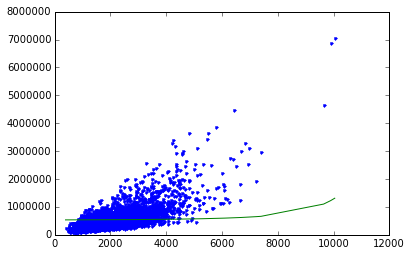

In [103]:
plot_15degree(set3)

524562.969047 [  2.08596194e+00   4.05035772e-04   7.46864647e-08   1.13096608e-11
   1.45864442e-15   1.73561251e-19   2.01609632e-23   2.34605255e-27
   2.75636073e-31   3.27043069e-35   3.91046855e-39   4.70118041e-43
   5.67212304e-47   6.85958087e-51   8.30843630e-55]


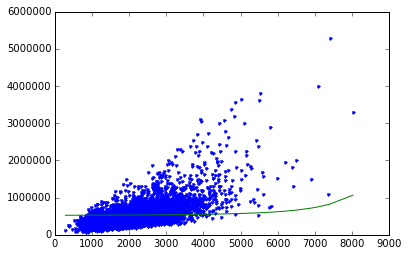

In [104]:
plot_15degree(set4)

Selecting an L2 penalty via cross-validation
Just like the polynomial degree, the L2 penalty is a "magic" parameter we need to select. We could use the validation set approach as we did in the last module, but that approach has a major disadvantage: it leaves fewer observations available for training. Cross-validation seeks to overcome this issue by using all of the training set in a smart way.

We will implement a kind of cross-validation called k-fold cross-validation. The method gets its name because it involves dividing the training set into k segments of roughtly equal size. Similar to the validation set method, we measure the validation error with one of the segments designated as the validation set. The major difference is that we repeat the process k times as follows:

Set aside segment 0 as the validation set, and fit a model on rest of data, and evalutate it on this validation set
Set aside segment 1 as the validation set, and fit a model on rest of data, and evalutate it on this validation set
...
Set aside segment k-1 as the validation set, and fit a model on rest of data, and evalutate it on this validation set
After this process, we compute the average of the k validation errors, and use it as an estimate of the generalization error. Notice that all observations are used for both training and validation, as we iterate over segments of data.

To estimate the generalization error well, it is crucial to shuffle the training data before dividing them into segments. We reserve 10% of the data as the test set and randomly shuffle the remainder. Le'ts call the shuffled data 'train_valid_shuffled'.

For the purpose of this assignment, let us download the csv file containing pre-shuffled rows of training and validation sets combined: wk3_kc_house_train_valid_shuffled.csv. In practice, you would shuffle the rows with a dynamically determined random seed.

In [105]:
train_valid_shuffled = pd.read_csv('wk3_kc_house_train_valid_shuffled 2.csv', dtype=dtype_dict)
test = pd.read_csv('wk3_kc_house_test_data.csv', dtype=dtype_dict)

Divide the combined training and validation set into equal segments. Each segment should receive n/k elements, where n is the number of observations in the training set and k is the number of segments. Since the segment 0 starts at index 0 and contains n/k elements, it ends at index (n/k)-1. The segment 1 starts where the segment 0 left off, at index (n/k). With n/k elements, the segment 1 ends at index (n*2/k)-1. Continuing in this fashion, we deduce that the segment i starts at index (n*i/k) and ends at (n*(i+1)/k)-1.

With this pattern in mind, we write a short loop that prints the starting and ending indices of each segment, just to make sure you are getting the splits right.

In [106]:
n = len(train_valid_shuffled)
k = 10 # 10-fold cross-validation

for i in xrange(k):
    start = (n*i)/k
    end = (n*(i+1))/k-1
    print i, (start, end)

0 (0, 1938)
1 (1939, 3878)
2 (3879, 5817)
3 (5818, 7757)
4 (7758, 9697)
5 (9698, 11636)
6 (11637, 13576)
7 (13577, 15515)
8 (15516, 17455)
9 (17456, 19395)


Now we are ready to implement k-fold cross-validation. Write a function that computes k validation errors by designating each of the k segments as the validation set. It accepts as parameters (i) k, (ii) l2_penalty, (iii) dataframe containing input features (e.g. poly15_data) and (iv) column of output values (e.g. price). The function returns the average validation error using k segments as validation sets. We shall assume that the input dataframe does not contain the output column.

For each i in [0, 1, ... k-1]:

Compute starting and ending indices of segment i and call 'start' and 'end'
Form validation set by taking a slice (start:end+1) from the data.
Form training set by appending slice (end+1:n) to the end of slice (0:start).
Train a linear model using training set just formed, with a given l2_penalty
Compute validation error (RSS) using validation set just formed

In [107]:
def k_fold_cross_validation(k, l2_penalty):
    # form validation set by taking a slice (start:end+1) from the data
    n = len(train_valid_shuffled)
    RSS_list = []
    for i in xrange(k):
        start = (n*i)/k
        end = (n*(i+1))/k-1
    
        validation_set = train_valid_shuffled[start:end+1]
        training_set = train_valid_shuffled[0:start].append(train_valid_shuffled[end+1:n])
        poly15_data = polynomial_dataframe(training_set['sqft_living'], 15)
        valid_data = polynomial_dataframe(validation_set['sqft_living'], 15)
        my_features = poly15_data.columns
        valid_features = valid_data.columns
        poly15_data['price'] = training_set['price']
        valid_data['price'] = validation_set['price']
        model = linear_model.Ridge(alpha=l2_penalty, normalize=True)
        model.fit(poly15_data[my_features],poly15_data['price'])
        RSS = np.sum((model.predict(valid_data[my_features]) -valid_data['price'])**2)
        RSS_list.append(RSS)
    average_validation_error = np.mean(RSS_list)
    return average_validation_error

In [108]:
l2_penalty = np.logspace(3, 9, num=13)

In [109]:
for i in l2_penalty:
    print i,k_fold_cross_validation(10, i)

1000.0 2.64977361037e+14
3162.27766017 2.65692935858e+14
10000.0 2.65924368957e+14
31622.7766017 2.65998081509e+14
100000.0 2.66021444554e+14
316227.766017 2.66028837919e+14
1000000.0 2.66031176438e+14
3162277.66017 2.66031915997e+14
10000000.0 2.66032149871e+14
31622776.6017 2.66032223829e+14
100000000.0 2.66032247216e+14
316227766.017 2.66032254612e+14
1000000000.0 2.66032256951e+14


In [110]:
poly15_data = polynomial_dataframe(test['sqft_living'], 15)
test_features = poly15_data.columns
poly15_data['price'] = test['price']
model_test = linear_model.Ridge(alpha=1000, normalize=True)
model_test.fit(poly15_data[test_features], poly15_data['price'])
RSS_test = np.sum((model_test.predict(poly15_data[test_features]) - poly15_data['price'])**2)
print RSS_test

2.8326570543e+14
